# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how="outer")

# Display the data table for preview
combined_data.head()
print(len(combined_data))


1893


In [41]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [42]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
short_combined_data = combined_data[["Mouse ID", "Timepoint"]]
duplicate_mice = short_combined_data[short_combined_data.duplicated()]
print(duplicate_mice)
ID = duplicate_mice["Mouse ID"].unique()
ID

#{JT} - here, using duplicated() we identify all the rows containing duplicate data based on Mouse ID and Timepoint (i.e. Mice with repeated data for points in time.)

    Mouse ID  Timepoint
587     g989          0
589     g989          5
591     g989         10
593     g989         15
595     g989         20


array(['g989'], dtype=object)

In [43]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_data = combined_data[combined_data["Mouse ID"].isin(ID)]
duplicate_mice_data

#{JT} - .isin() allows us to display only data that contains the information contained in the variable ID (which the duplicated mouse data), and display all rows relating to that information.

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
592,g989,15,51.325852,1,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
594,g989,20,55.326122,1,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data.loc[~combined_data["Mouse ID"].isin(ID)]
clean_data_df.head()

#{JT} - Used help from AI to make this dynamic and not have to manually input != "g989" after Mouse ID. The tilde does the opposite of the prior step: it returns all data where the repeated ID
# is not found.

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [45]:
# Checking the number of mice in the clean DataFrame.
clean_data_df["Mouse ID"].nunique()

248

## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

grouped_data = clean_data_df.groupby(["Drug Regimen"])
tumor_mean = grouped_data["Tumor Volume (mm3)"].mean()
tumor_meadian = grouped_data["Tumor Volume (mm3)"].median()
tumor_variance = grouped_data["Tumor Volume (mm3)"].var()
tumor_std = grouped_data["Tumor Volume (mm3)"].std()
tumor_sem = grouped_data["Tumor Volume (mm3)"].sem()

summary_stats_tumors = pd.DataFrame({
    "Mean Tumor Volume" : tumor_mean,
    "Median Tumor Volume" : tumor_meadian,
    "Tumor Volume Variance": tumor_variance,
    "Tumor Volume Std. Dev.": tumor_std,
    "Tumor Volume Std. Err.": tumor_sem
})

summary_stats_tumors

#{JT} - Here we conduct series mathematics to find the requested statistics for each Drug Regimen. The groupby() splits the data by regimen, and the functions compute the requested
#metrics for each group's Tumor Volume column.

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_advanced = clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_advanced.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], summary_stats_advanced.columns])

#{JT} - the first line of code produces the results. The second one adds the "Tumor Volume (mm3) header". This is a trick I found online and asking AI to assist. Just trying to
#match to the solution provided.

summary_stats_advanced


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

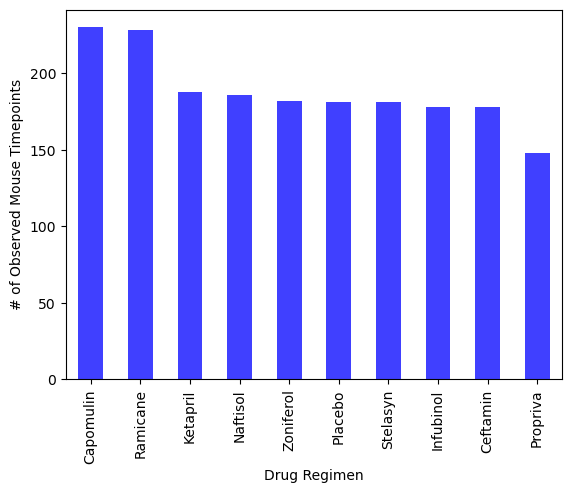

In [48]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_data = clean_data_df["Drug Regimen"].value_counts() #{JT} - We find unique values (drug regimens - bins) and their counts, and then plot in a bar chart.
drug_regimen_data.plot(kind="bar",
                       facecolor="blue",
                       alpha=0.75,
                       xlabel="Drug Regimen",
                       ylabel="# of Observed Mouse Timepoints")

# xticklabels=short_combined_data.index
# figure1.set_xticklabels(xticklabels, rotation=90)

# plt.show()


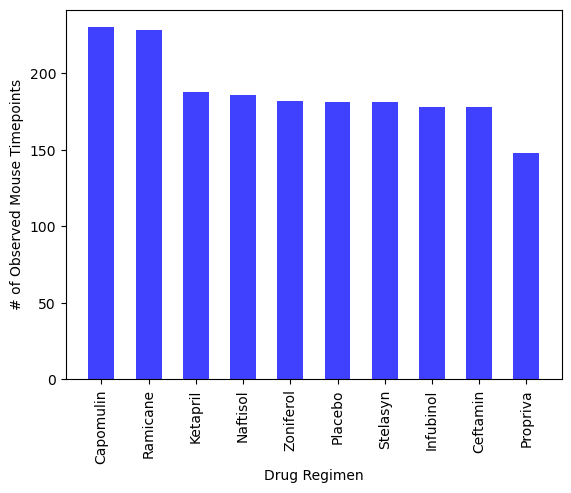

In [49]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = clean_data_df["Drug Regimen"].value_counts()
x_axis = counts.index
y_axis = counts.values

plt.bar(x_axis, y_axis, facecolor = "blue", alpha = 0.75, width=0.55)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()


<Axes: ylabel='count'>

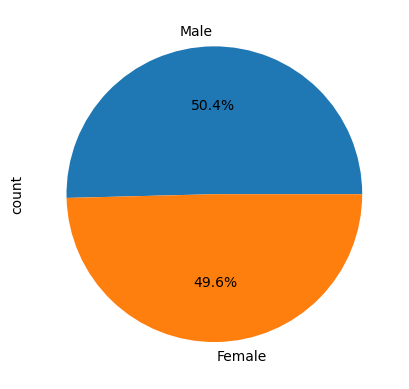

In [50]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_IDs_and_sexes = clean_data_df [["Mouse ID","Sex"]].drop_duplicates(["Mouse ID"])
#{JT} - there's only two sexes in the data, but multiple mice within each sex, and multiple observations of each mouse over time...
#So, we need to drop duplicates here to get one row for each Mouse ID that gives us each mouse's sex too.

sex_value_counts = unique_mice_IDs_and_sexes["Sex"].value_counts()
#{JT} - this gives us the total Male and Female mice by counting Mouse IDs and placing them in the appropriate sex category (based on the information on Sex column)

# Make the pie chart
sex_value_counts.plot(kind="pie",autopct = "%1.1f%%")


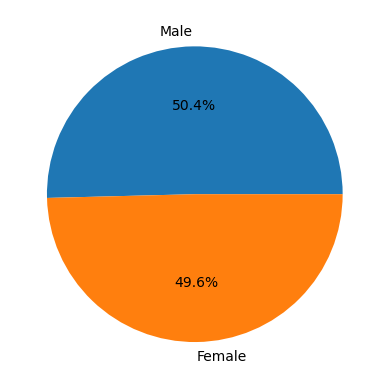

In [51]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_IDs_and_sexes = clean_data_df[["Mouse ID","Sex"]].drop_duplicates(["Mouse ID"])
sex_value_counts = unique_mice_IDs_and_sexes["Sex"].value_counts()

# Make the pie chart
labels = sex_value_counts.index
counts = sex_value_counts.values
#{JT} - these two steps allow us to split the data into two series so we can plot them.

plt.pie(counts, autopct="%1.1f%%", labels=labels)
plt.show()

## Quartiles, Outliers and Boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
select_regimen_df = clean_data_df[clean_data_df["Drug Regimen"].isin(regimen_list)]

# Start by getting the last (greatest) timepoint for each mouse
mouse_last_timepoint = select_regimen_df.groupby(["Mouse ID"])["Timepoint"].max() #{JT} - gives us the last timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(select_regimen_df, mouse_last_timepoint, on=["Mouse ID", "Timepoint"], how="inner")
merged_data = merged_data[["Mouse ID", "Timepoint", "Drug Regimen","Tumor Volume (mm3)"]]
merged_data





,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a275,45,Ceftamin,62.999356
3,a411,45,Ramicane,38.407618
4,a444,45,Ramicane,43.047543
...,...,...,...,...
95,y769,45,Ceftamin,68.594745
96,y793,45,Capomulin,31.896238
97,y865,45,Ceftamin,64.729837
98,z578,45,Ramicane,30.638696


In [53]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = {regimen:[] for regimen in regimen_list}

# Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in regimen_list:
    regimen_data = merged_data[merged_data["Drug Regimen"]==regimen]
    tumor_data[regimen] = regimen_data["Tumor Volume (mm3)"].tolist()

# Calculate the IQR and quantitatively determine if there are any potential outliers.
outliers = {regimen: [] for regimen in regimen_list} #{JT} - same concept here.

for regimen in regimen_list:
    tumor_series = pd.Series(tumor_data[regimen])
    quartiles = tumor_series.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr

    regimen_outliers = tumor_series[(tumor_series < lower_bound) | (tumor_series > upper_bound)].tolist()
    outliers[regimen] = regimen_outliers

    print(f"{regimen} - Lower Quartile: {lowerq}, Upper Quartile: {upperq}, IQR: {iqr}")
    print(f"{regimen} - Outliers: {regimen_outliers}")

#{JT} - I had to use the help of AI on this one to get clarity on the use of dictionaries to capture data coming out of the for loop into the respective key value pairs - meaning, all
#data for regimen "Capomulin" should be placed under the "Capomulin" value pair list, and so on for the other regimens. Once the data is sorted (lists are tied to each drug regimen key
#via the use of dictionaries, we run all stats for the boxplot within a for loop to obtain the values for each regimen in an efficient manner (vs. havint to repeat the code for each regimen)

Capomulin - Lower Quartile: 32.37735684, Upper Quartile: 40.1592203, IQR: 7.781863460000004
Capomulin - Outliers: []
Ramicane - Lower Quartile: 31.56046955, Upper Quartile: 40.65900627, IQR: 9.098536719999998
Ramicane - Outliers: []
Infubinol - Lower Quartile: 54.04860769, Upper Quartile: 65.52574285, IQR: 11.477135160000003
Infubinol - Outliers: [36.3213458]
Ceftamin - Lower Quartile: 48.72207785, Upper Quartile: 64.29983003, IQR: 15.577752179999997
Ceftamin - Outliers: []


C:\Users\jitra\AppData\Local\Temp\ipykernel_4740\2579674227.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=regimen_list)


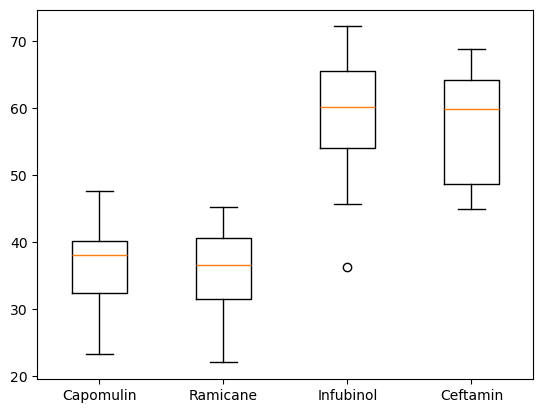

In [54]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
boxplot_data = [tumor_data[regimen] for regimen in regimen_list] # {JT} - here's where we access the lists captured above by calling the regimen names (within another for loop)
plt.boxplot(boxplot_data, labels=regimen_list)
plt.show()



## Line and Scatter Plots

['b128' 'b742' 'f966' 'g288' 'g316' 'i557' 'i738' 'j119' 'j246' 'l509'
 'l897' 'm601' 'm957' 'r157' 'r554' 'r944' 's185' 's710' 't565' 'u364'
 'v923' 'w150' 'w914' 'x401' 'y793']


Text(0.5, 0, 'Timepoint')

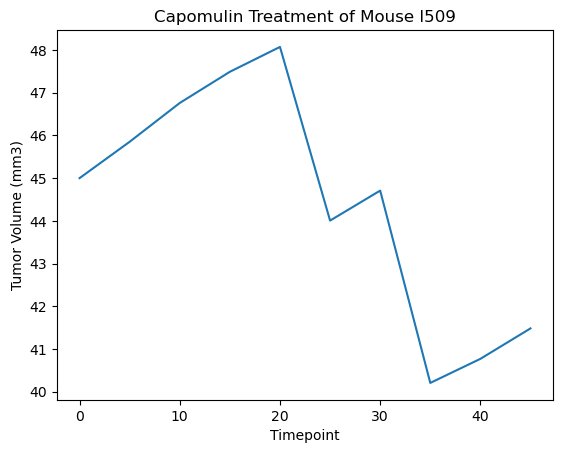

In [55]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = clean_data_df[clean_data_df["Drug Regimen"]=="Capomulin"]
print(Capomulin_df["Mouse ID"].unique())
#{JT} - Printing to see which Mouse IDs are available within the Capomulin data.

Mouse_data = Capomulin_df[Capomulin_df["Mouse ID"]=="l509"]
plt.plot(Mouse_data["Timepoint"],Mouse_data["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

Text(0.5, 0, 'Weight (g)')

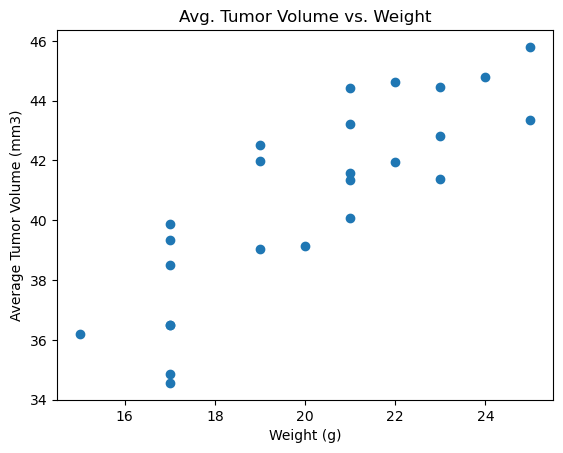

In [56]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumors = Capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
y_axis = average_tumors.values

mouse_weights = Capomulin_df.groupby("Mouse ID")["Weight (g)"].max()
x_axis = mouse_weights.values

plt.scatter(x_axis,y_axis)
plt.title ("Avg. Tumor Volume vs. Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


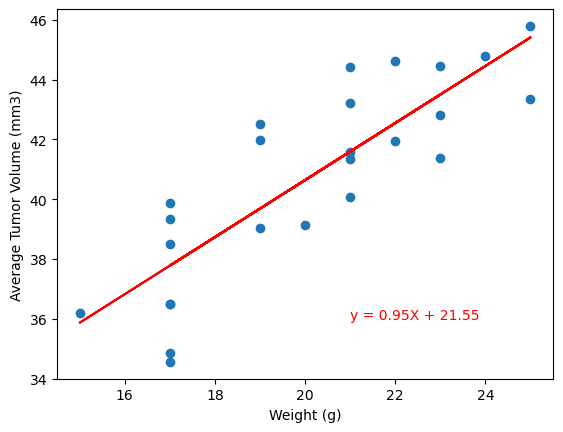

In [57]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, intercept, r_value, p_value, std_err = st.linregress(x_axis, y_axis)
print(f'The correlation between mouse weight and the average tumor volume is {round(r_value,2)}')
regress_values = slope * x_axis + intercept
linear_eq = "y = " + str(round(slope,2)) + "X + "+ str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis, regress_values,"-r")
plt.annotate(linear_eq,(21,36),fontsize=10, color="red")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()
